# Training 4. NumPy &#8594; Pandas

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi':100,'savefig.dpi':300,'savefig.bbox':'tight'})

In [2]:
import pandas as pd

## Numpy array shape, hstack, vstack, dstack, concatenate 

In [3]:
f = np.load("../test_data/basin_mean.npz")

In [4]:
f["time"]

array(['2008-01-01T12:00:00.000000000', '2008-01-02T12:00:00.000000000',
       '2008-01-03T12:00:00.000000000', ...,
       '2021-12-29T12:00:00.000000000', '2021-12-30T12:00:00.000000000',
       '2021-12-31T12:00:00.000000000'], dtype='datetime64[ns]')

In [5]:
ptem = f["ptem"].copy()

In [6]:
ptem.shape

(22, 5114)

In [7]:
ptem.shape = (5114,22)

In [8]:
ptem.shape

(5114, 22)

In [9]:
f["ptem"][0,:]

array([ 9.477114,  9.405213,  9.305872, ..., 10.735794, 10.703838,
       10.651675], dtype=float32)

In [10]:
f["ptem"].shape

(22, 5114)

In [11]:
f["time"].shape

(5114,)

In [12]:
ptem[:,0]

array([9.477114 , 8.274369 , 7.4541383, ..., 8.855414 , 8.857826 ,
       8.858735 ], dtype=float32)

In [13]:
np.vstack?

Signature: np.vstack(tup, *, dtype=None, casting='same_kind')
Docstring:
Stack arrays in sequence vertically (row wise).

This is equivalent to concatenation along the first axis after 1-D arrays
of shape `(N,)` have been reshaped to `(1,N)`. Rebuilds arrays divided by
`vsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

``np.row_stack`` is an alias for `vstack`. They are the same function.

Parameters
----------
tup : sequence of ndarrays
    The arrays must have the same shape along all but the first axis.
    1-D arrays must have the same length.

dtype : str or dtype
    If provided, the destination array will have this dtype. Cannot be
    provided together with `out`.

.. versionadded:: 1.24

casting : {'no', 'equiv', 'safe', 'same_kind',

In [14]:
np.hstack?

Signature: np.hstack(tup, *, dtype=None, casting='same_kind')
Docstring:
Stack arrays in sequence horizontally (column wise).

This is equivalent to concatenation along the second axis, except for 1-D
arrays where it concatenates along the first axis. Rebuilds arrays divided
by `hsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

Parameters
----------
tup : sequence of ndarrays
    The arrays must have the same shape along all but the second axis,
    except 1-D arrays which can be any length.

dtype : str or dtype
    If provided, the destination array will have this dtype. Cannot be
    provided together with `out`.

.. versionadded:: 1.24

casting : {'no', 'equiv', 'safe', 'same_kind', 'unsafe'}, optional
    Controls what kind of data casti

In [15]:
np.dstack?

Signature: np.dstack(tup)
Docstring:
Stack arrays in sequence depth wise (along third axis).

This is equivalent to concatenation along the third axis after 2-D arrays
of shape `(M,N)` have been reshaped to `(M,N,1)` and 1-D arrays of shape
`(N,)` have been reshaped to `(1,N,1)`. Rebuilds arrays divided by
`dsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

Parameters
----------
tup : sequence of arrays
    The arrays must have the same shape along all but the third axis.
    1-D or 2-D arrays must have the same shape.

Returns
-------
stacked : ndarray
    The array formed by stacking the given arrays, will be at least 3-D.

See Also
--------
concatenate : Join a sequence of arrays along an existing axis.
stack : Join a sequence of arrays alo

In [16]:
np.vstack((f["ptem"][0],f["ke"][0]))

array([[ 9.477114  ,  9.405213  ,  9.305872  , ..., 10.735794  ,
        10.703838  , 10.651675  ],
       [ 0.01400182,  0.01442961,  0.01692018, ...,  0.01403542,
         0.01347762,  0.01209338]], dtype=float32)

In [17]:
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
) -> 'None'
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will d

In [18]:
pd.DataFrame(index=f["time"],data=np.vstack((f["ptem"][0],f["ke"][0])).T,columns=["T","KE"])

,T,KE
2008-01-01 12:00:00,9.477114,0.014002
2008-01-02 12:00:00,9.405213,0.014430
2008-01-03 12:00:00,9.305872,0.016920
2008-01-04 12:00:00,9.183269,0.019572
2008-01-05 12:00:00,9.038937,0.021206
...,...,...
2021-12-27 12:00:00,10.758364,0.018083
2021-12-28 12:00:00,10.746964,0.015538
2021-12-29 12:00:00,10.735794,0.014035
2021-12-30 12:00:00,10.703838,0.013478


In [19]:
df = _

In [20]:
type(df)

pandas.core.frame.DataFrame

In [21]:
type(df["KE"])

pandas.core.series.Series

In [22]:
df.dtypes

T     float32
KE    float32
dtype: object

## Numpy datetime64 vs DataTime index

In [23]:
f['time']

array(['2008-01-01T12:00:00.000000000', '2008-01-02T12:00:00.000000000',
       '2008-01-03T12:00:00.000000000', ...,
       '2021-12-29T12:00:00.000000000', '2021-12-30T12:00:00.000000000',
       '2021-12-31T12:00:00.000000000'], dtype='datetime64[ns]')

In [24]:
df.index

DatetimeIndex(['2008-01-01 12:00:00', '2008-01-02 12:00:00',
               '2008-01-03 12:00:00', '2008-01-04 12:00:00',
               '2008-01-05 12:00:00', '2008-01-06 12:00:00',
               '2008-01-07 12:00:00', '2008-01-08 12:00:00',
               '2008-01-09 12:00:00', '2008-01-10 12:00:00',
               ...
               '2021-12-22 12:00:00', '2021-12-23 12:00:00',
               '2021-12-24 12:00:00', '2021-12-25 12:00:00',
               '2021-12-26 12:00:00', '2021-12-27 12:00:00',
               '2021-12-28 12:00:00', '2021-12-29 12:00:00',
               '2021-12-30 12:00:00', '2021-12-31 12:00:00'],
              dtype='datetime64[ns]', length=5114, freq=None)

In [25]:
df.index.values

array(['2008-01-01T12:00:00.000000000', '2008-01-02T12:00:00.000000000',
       '2008-01-03T12:00:00.000000000', ...,
       '2021-12-29T12:00:00.000000000', '2021-12-30T12:00:00.000000000',
       '2021-12-31T12:00:00.000000000'], dtype='datetime64[ns]')

### *Зачем?*

<Axes: >

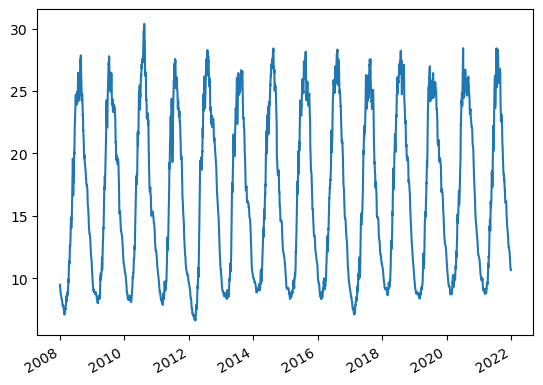

In [26]:
df["T"].plot()

In [27]:
plt.rcParams.update({"axes.grid":True})

<Axes: >

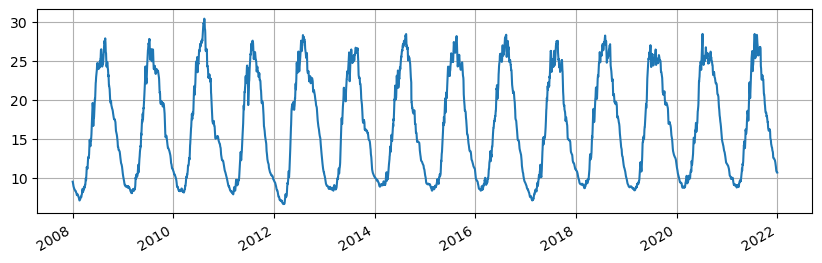

In [28]:
df["T"].plot(figsize=(10,3))

In [29]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x7f1147f87510>
File:           /opt/mamba/envs/ocean/lib/python3.11/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area p

In [30]:
df

,T,KE
2008-01-01 12:00:00,9.477114,0.014002
2008-01-02 12:00:00,9.405213,0.014430
2008-01-03 12:00:00,9.305872,0.016920
2008-01-04 12:00:00,9.183269,0.019572
2008-01-05 12:00:00,9.038937,0.021206
...,...,...
2021-12-27 12:00:00,10.758364,0.018083
2021-12-28 12:00:00,10.746964,0.015538
2021-12-29 12:00:00,10.735794,0.014035
2021-12-30 12:00:00,10.703838,0.013478


In [31]:
df.tail(10)

,T,KE
2021-12-22 12:00:00,11.183285,0.016879
2021-12-23 12:00:00,11.018246,0.015853
2021-12-24 12:00:00,10.896086,0.016662
2021-12-25 12:00:00,10.789364,0.016600
2021-12-26 12:00:00,10.758384,0.016436
2021-12-27 12:00:00,10.758364,0.018083
2021-12-28 12:00:00,10.746964,0.015538
2021-12-29 12:00:00,10.735794,0.014035
2021-12-30 12:00:00,10.703838,0.013478
2021-12-31 12:00:00,10.651675,0.012093


In [32]:
df.loc?

Type:        property
String form: <property object at 0x7f114cceee30>
Docstring:  
Access a group of rows and columns by label(s) or a boolean array.

``.loc[]`` is primarily label based, but may also be used with a
boolean array.

Allowed inputs are:

- A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
  interpreted as a *label* of the index, and **never** as an
  integer position along the index).
- A list or array of labels, e.g. ``['a', 'b', 'c']``.
- A slice object with labels, e.g. ``'a':'f'``.

  .. warning:: Note that contrary to usual python slices, **both** the
      start and the stop are included

- A boolean array of the same length as the axis being sliced,
  e.g. ``[True, False, True]``.
- An alignable boolean Series. The index of the key will be aligned before
  masking.
- An alignable Index. The Index of the returned selection will be the input.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output for i

In [33]:
df.loc["2008-01":"2008-02"]

,T,KE
2008-01-01 12:00:00,9.477114,0.014002
2008-01-02 12:00:00,9.405213,0.014430
2008-01-03 12:00:00,9.305872,0.016920
2008-01-04 12:00:00,9.183269,0.019572
2008-01-05 12:00:00,9.038937,0.021206
2008-01-06 12:00:00,8.932671,0.018417
2008-01-07 12:00:00,8.877769,0.018068
2008-01-08 12:00:00,8.828435,0.017831
2008-01-09 12:00:00,8.755328,0.018174
2008-01-10 12:00:00,8.684992,0.018357


<Axes: >

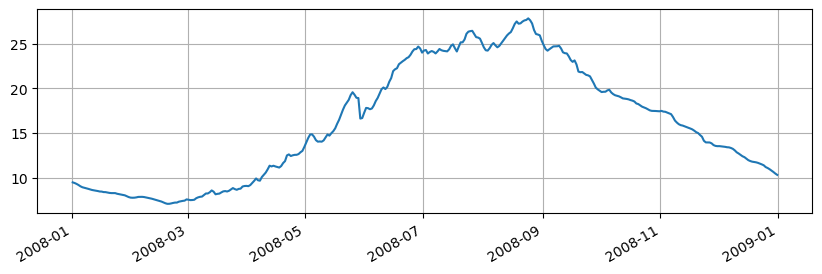

In [34]:
df.loc["2008","T"].plot(figsize=(10,3))

<Axes: ylabel='T, ℃'>

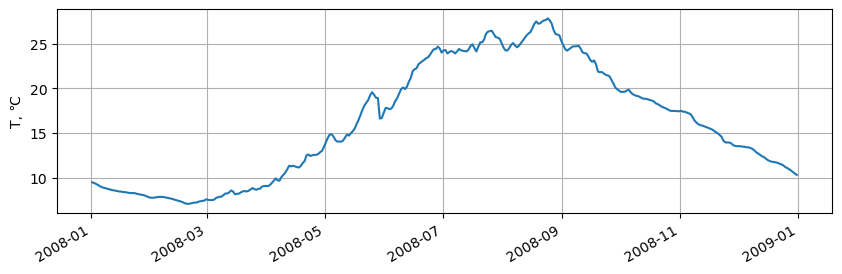

In [35]:
df.loc["2008","T"].plot(figsize=(10,3),ylabel="T, \u2103")

In [36]:
plt.rcParams.update({"figure.figsize":(10,3)})

<Axes: ylabel='T, ℃'>

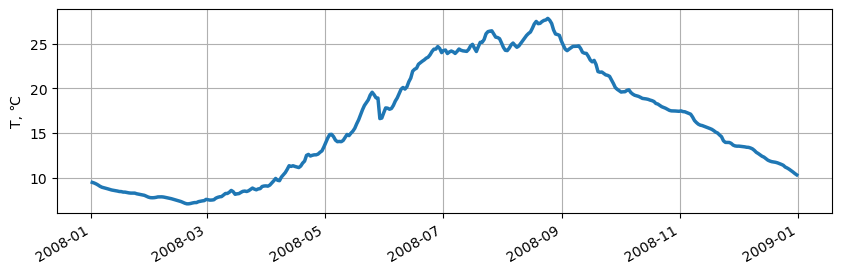

In [37]:
df.loc["2008","T"].plot(ylabel="T, \u2103",lw=2.5)

<Axes: ylabel='T, ℃'>

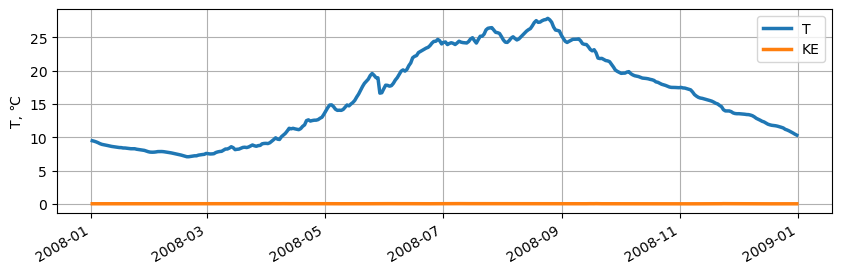

In [38]:
df.loc["2008",:].plot(ylabel="T, \u2103",lw=2.5)

In [39]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'bo

<Axes: ylabel='T, ℃'>

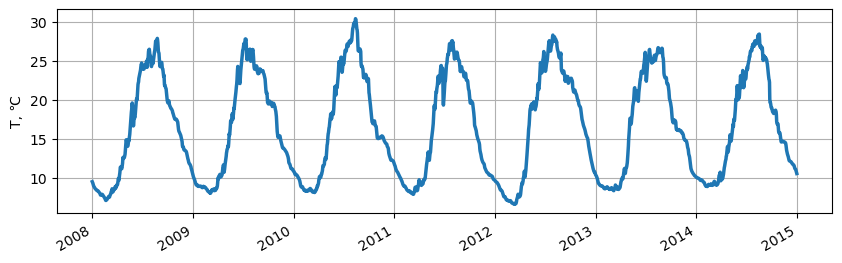

In [40]:
df.loc["2008":"2014","T"].plot(ylabel="T, \u2103",lw=2.5)

<Axes: ylabel='KE, m²/s²'>

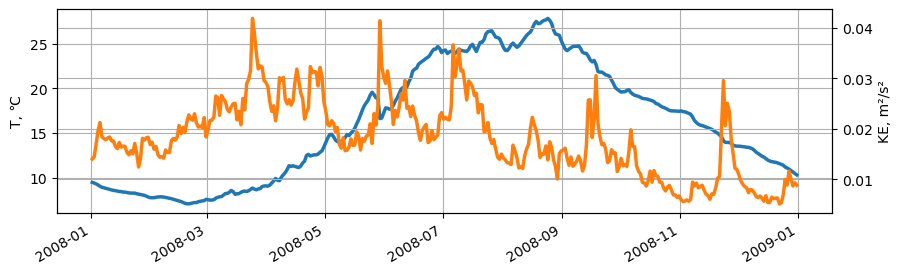

In [41]:
df.loc["2008","T"].plot(ylabel="T, \u2103",lw=2.5)
ax1 = plt.gca().twinx()
df.loc["2008","KE"].plot(ax=ax1,ylabel="KE, m\u00b2/s\u00b2",color="#ff7f0e",lw=2.5)

## Статистика, понижение размерности 

In [42]:
df.describe()

,T,KE
count,5114.000000,5114.000000
mean,16.564823,0.016830
std,6.587880,0.007360
min,6.603570,0.003467
25%,10.029526,0.011825
50%,15.554267,0.016040
75%,23.152845,0.020627
max,30.375422,0.066300


In [43]:
df.mean?

Signature:
df.mean(
    axis: 'int | None | lib.NoDefault' = <no_default>,
    skipna=True,
    level=None,
    numeric_only=None,
    **kwargs,
)
Docstring:
Return the mean of the values over the requested axis.

Parameters
----------
axis : {index (0), columns (1)}
    Axis for the function to be applied on.
    For `Series` this parameter is unused and defaults to 0.
skipna : bool, default True
    Exclude NA/null values when computing the result.
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a Series.

    .. deprecated:: 1.3.0
        The level keyword is deprecated. Use groupby instead.
numeric_only : bool, default None
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data. Not implemented for Series.

    .. deprecated:: 1.5.0
        Specifying ``numeric_only=None`` is deprecated. The default value will be
        ``False`

In [44]:
df.mean()["T"]

16.564823

In [45]:
df["Ta"] = df["T"]-df.mean()["T"]

<Axes: >

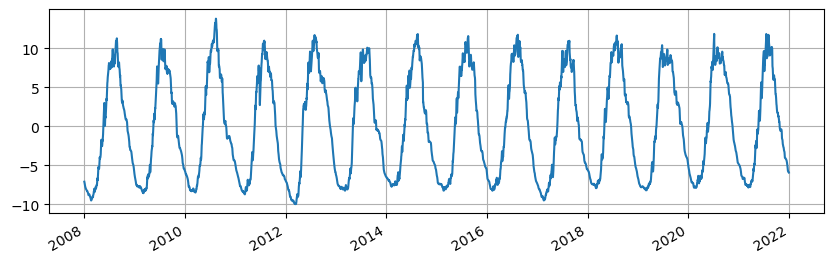

In [46]:
df["Ta"].plot()

In [47]:
df.KE

2008-01-01 12:00:00    0.014002
2008-01-02 12:00:00    0.014430
2008-01-03 12:00:00    0.016920
2008-01-04 12:00:00    0.019572
2008-01-05 12:00:00    0.021206
                         ...   
2021-12-27 12:00:00    0.018083
2021-12-28 12:00:00    0.015538
2021-12-29 12:00:00    0.014035
2021-12-30 12:00:00    0.013478
2021-12-31 12:00:00    0.012093
Name: KE, Length: 5114, dtype: float32

In [48]:
np.mean(df)

/opt/mamba/envs/ocean/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


T     1.656482e+01
KE    1.682977e-02
Ta    4.654617e-07
dtype: float32

In [49]:
df["u"] = np.sqrt(2*df.KE)

<Axes: >

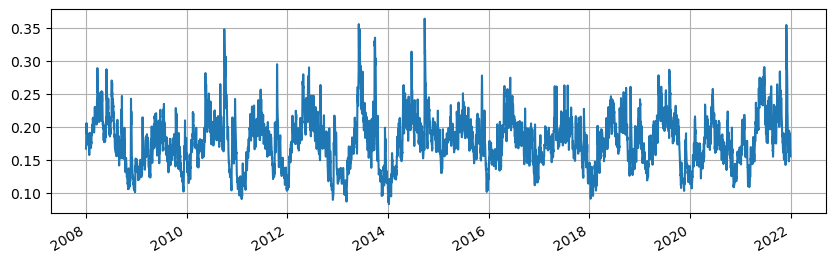

In [50]:
df["u"].plot()

In [51]:
df.median()

T     15.554268
KE     0.016040
Ta    -1.010556
u      0.179107
dtype: float32

In [52]:
df.var()

T     43.400158
KE     0.000054
Ta    43.400181
u      0.001500
dtype: float32

In [53]:
df.std()

T     6.587880
KE    0.007360
Ta    6.587882
u     0.038731
dtype: float32

In [54]:
df.resample?

Signature:
df.resample(
    rule,
    axis: 'Axis' = 0,
    closed: 'str | None' = None,
    label: 'str | None' = None,
    convention: 'str' = 'start',
    kind: 'str | None' = None,
    loffset=None,
    base: 'int | None' = None,
    on: 'Level' = None,
    level: 'Level' = None,
    origin: 'str | TimestampConvertibleTypes' = 'start_day',
    offset: 'TimedeltaConvertibleTypes | None' = None,
    group_keys: 'bool | lib.NoDefault' = <no_default>,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time series.
The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
series/index to the ``on``/``level`` keyword parameter.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or object representing target conversion.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Which axis to use for up- or d

In [55]:
pd.Timedelta?

Init signature: pd.Timedelta(value=<object object at 0x7f11533f0b60>, unit=None, **kwargs)
Docstring:     
Represents a duration, the difference between two dates or times.

Timedelta is the pandas equivalent of python's ``datetime.timedelta``
and is interchangeable with it in most cases.

Parameters
----------
value : Timedelta, timedelta, np.timedelta64, str, or int
unit : str, default 'ns'
    Denote the unit of the input, if input is an integer.

    Possible values:

    * 'W', 'D', 'T', 'S', 'L', 'U', or 'N'
    * 'days' or 'day'
    * 'hours', 'hour', 'hr', or 'h'
    * 'minutes', 'minute', 'min', or 'm'
    * 'seconds', 'second', or 'sec'
    * 'milliseconds', 'millisecond', 'millis', or 'milli'
    * 'microseconds', 'microsecond', 'micros', or 'micro'
    * 'nanoseconds', 'nanosecond', 'nanos', 'nano', or 'ns'.

**kwargs
    Available kwargs: {days, seconds, microseconds,
    milliseconds, minutes, hours, weeks}.
    Values for construction in compat with datetime.timedelta.
 

In [56]:
pd.DateOffset?

Init signature: pd.DateOffset(self, /, *args, **kwargs)
Docstring:     
Standard kind of date increment used for a date range.

Works exactly like the keyword argument form of relativedelta.
Note that the positional argument form of relativedelata is not
supported. Use of the keyword n is discouraged-- you would be better
off specifying n in the keywords you use, but regardless it is
there for you. n is needed for DateOffset subclasses.

DateOffset works as follows.  Each offset specify a set of dates
that conform to the DateOffset.  For example, Bday defines this
set to be the set of dates that are weekdays (M-F).  To test if a
date is in the set of a DateOffset dateOffset we can use the
is_on_offset method: dateOffset.is_on_offset(date).

If a date is not on a valid date, the rollback and rollforward
methods can be used to roll the date to the nearest valid date
before/after the date.

DateOffsets can be created to move dates forward a given number of
valid dates.  For example, Bday(

In [57]:
df.resample("Y")#.mean()

In [58]:
df.resample("10W").median()

,T,KE,Ta,u
2008-01-06,9.244570,0.017668,-7.320253,0.187939
2008-03-16,7.848761,0.018200,-8.716063,0.190789
2008-05-25,12.144197,0.024602,-4.420627,0.221822
2008-08-03,24.117609,0.022806,7.552786,0.213566
2008-10-12,24.447853,0.014993,7.883031,0.173167
...,...,...,...,...
2021-03-28,9.134418,0.012238,-7.430406,0.156444
2021-06-06,13.781841,0.020306,-2.782982,0.201522
2021-08-15,25.580027,0.027079,9.015203,0.232719
2021-10-24,22.524796,0.022547,5.959972,0.212354


<Axes: >

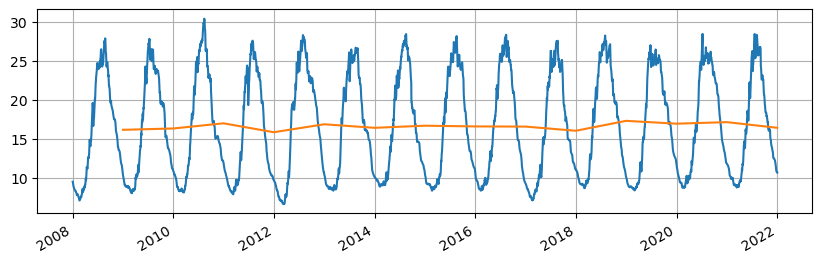

In [59]:
df["T"].plot(figsize=(10,3))
df["T"].resample("Y").mean().plot(ax=plt.gca())

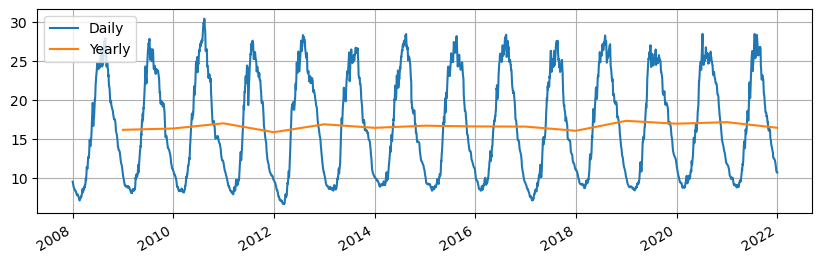

In [60]:
df["T"].plot(figsize=(10,3),label="Daily")
df["T"].resample("Y").mean().plot(ax=plt.gca(),label="Yearly")
plt.legend()

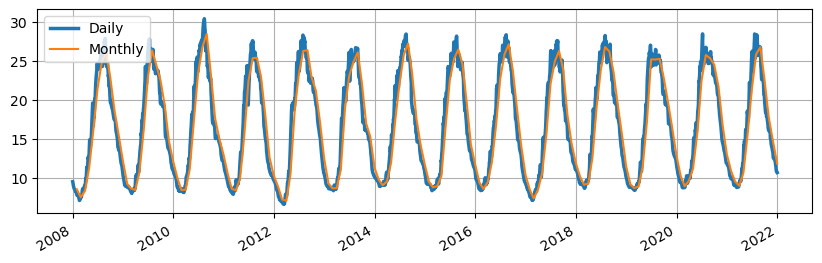

In [61]:
df["T"].plot(figsize=(10,3),label="Daily",lw=2.5)
df["T"].resample("M").mean().plot(ax=plt.gca(),label="Monthly")
plt.legend()

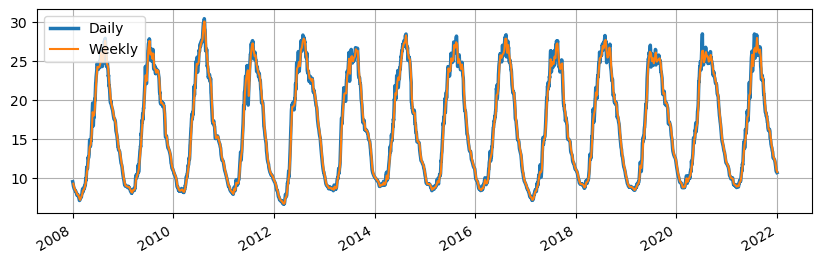

In [62]:
df["T"].plot(figsize=(10,3),label="Daily",lw=2.5)
df["T"].resample("W").mean().plot(ax=plt.gca(),label="Weekly")
plt.legend()

<Axes: >

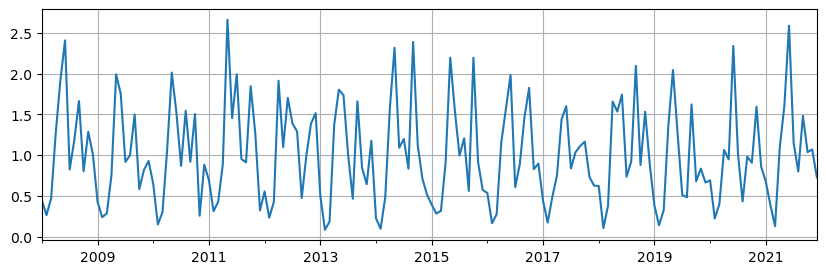

In [63]:
df["T"].resample("M").std().plot()

In [64]:
df.cummin

<bound method NDFrame._add_numeric_operations.<locals>.cummin of                              T        KE        Ta         u
2008-01-01 12:00:00   9.477114  0.014002 -7.087709  0.167343
2008-01-02 12:00:00   9.405213  0.014430 -7.159610  0.169880
2008-01-03 12:00:00   9.305872  0.016920 -7.258951  0.183958
2008-01-04 12:00:00   9.183269  0.019572 -7.381555  0.197846
2008-01-05 12:00:00   9.038937  0.021206 -7.525887  0.205942
...                        ...       ...       ...       ...
2021-12-27 12:00:00  10.758364  0.018083 -5.806459  0.190174
2021-12-28 12:00:00  10.746964  0.015538 -5.817860  0.176282
2021-12-29 12:00:00  10.735794  0.014035 -5.829029  0.167544
2021-12-30 12:00:00  10.703838  0.013478 -5.860985  0.164181
2021-12-31 12:00:00  10.651675  0.012093 -5.913148  0.155521

[5114 rows x 4 columns]>

<Axes: >

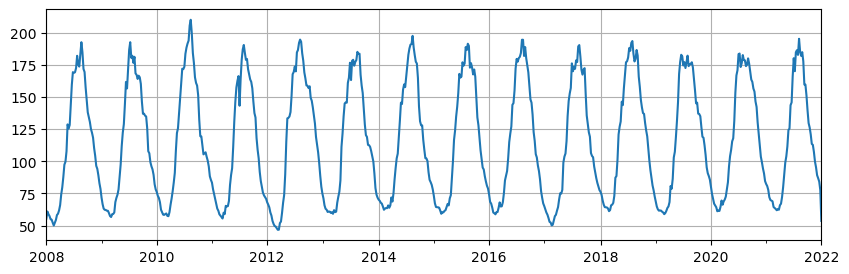

In [65]:
df["T"].resample("W").sum().plot()

In [66]:
df["T"].resample("W").cumsum().plot()

AttributeError: 'DatetimeIndexResampler' object has no attribute 'cumsum'

<Axes: >

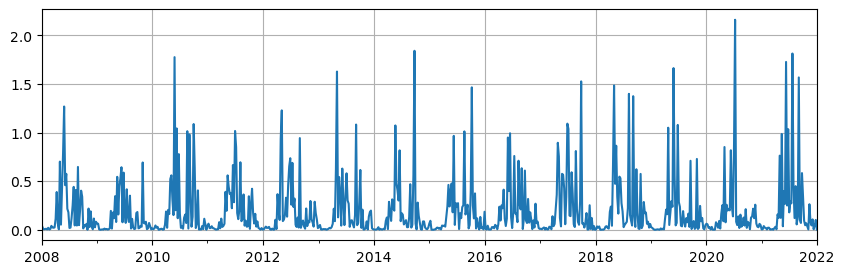

In [67]:
df["T"].resample("W").var().plot()

### Простой пример

In [68]:
monthly_anomaly = df-df.resample("M").mean()

<Axes: >

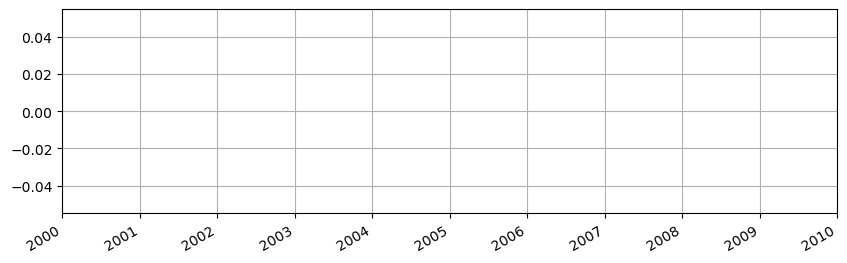

In [69]:
monthly_anomaly["u"].plot()

In [70]:
monthly_anomaly

,T,KE,Ta,u
2008-01-01 12:00:00,NaN,NaN,NaN,NaN
2008-01-02 12:00:00,NaN,NaN,NaN,NaN
2008-01-03 12:00:00,NaN,NaN,NaN,NaN
2008-01-04 12:00:00,NaN,NaN,NaN,NaN
2008-01-05 12:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-12-28 12:00:00,NaN,NaN,NaN,NaN
2021-12-29 12:00:00,NaN,NaN,NaN,NaN
2021-12-30 12:00:00,NaN,NaN,NaN,NaN
2021-12-31 00:00:00,NaN,NaN,NaN,NaN


In [71]:
mm = df.resample("M").mean()

In [72]:
mm.index

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=168, freq='M')

In [73]:
mm.head()

,T,KE,Ta,u
2008-01-31,8.515438,0.016780,-8.049385,0.182926
2008-02-29,7.488468,0.018566,-9.076355,0.192171
2008-03-31,8.311471,0.026983,-8.253352,0.231306
2008-04-30,11.265335,0.027290,-5.299488,0.233221
2008-05-31,16.193920,0.020465,-0.370904,0.200889


In [74]:
mm.reindex_like?

Signature:
mm.reindex_like(
    other,
    method: 'str | None' = None,
    copy: 'bool_t' = True,
    limit=None,
    tolerance=None,
) -> 'NDFrameT'
Docstring:
Return an object with matching indices as other object.

Conform the object to the same index on all axes. Optional
filling logic, placing NaN in locations having no value
in the previous index. A new object is produced unless the
new index is equivalent to the current one and copy=False.

Parameters
----------
other : Object of the same data type
    Its row and column indices are used to define the new indices
    of this object.
method : {None, 'backfill'/'bfill', 'pad'/'ffill', 'nearest'}
    Method to use for filling holes in reindexed DataFrame.
    Please note: this is only applicable to DataFrames/Series with a
    monotonically increasing/decreasing index.

    * None (default): don't fill gaps
    * pad / ffill: propagate last valid observation forward to next
      valid
    * backfill / bfill: use next valid observ

In [75]:
mmdf = mm.reindex_like(df,method="bfill")

In [76]:
monthly_anomaly = df-mmdf

In [77]:
mmdf

,T,KE,Ta,u
2008-01-01 12:00:00,8.515438,0.016780,-8.049385,0.182926
2008-01-02 12:00:00,8.515438,0.016780,-8.049385,0.182926
2008-01-03 12:00:00,8.515438,0.016780,-8.049385,0.182926
2008-01-04 12:00:00,8.515438,0.016780,-8.049385,0.182926
2008-01-05 12:00:00,8.515438,0.016780,-8.049385,0.182926
...,...,...,...,...
2021-12-27 12:00:00,11.776187,0.023805,-4.788636,0.210055
2021-12-28 12:00:00,11.776187,0.023805,-4.788636,0.210055
2021-12-29 12:00:00,11.776187,0.023805,-4.788636,0.210055
2021-12-30 12:00:00,11.776187,0.023805,-4.788636,0.210055


In [78]:
df

,T,KE,Ta,u
2008-01-01 12:00:00,9.477114,0.014002,-7.087709,0.167343
2008-01-02 12:00:00,9.405213,0.014430,-7.159610,0.169880
2008-01-03 12:00:00,9.305872,0.016920,-7.258951,0.183958
2008-01-04 12:00:00,9.183269,0.019572,-7.381555,0.197846
2008-01-05 12:00:00,9.038937,0.021206,-7.525887,0.205942
...,...,...,...,...
2021-12-27 12:00:00,10.758364,0.018083,-5.806459,0.190174
2021-12-28 12:00:00,10.746964,0.015538,-5.817860,0.176282
2021-12-29 12:00:00,10.735794,0.014035,-5.829029,0.167544
2021-12-30 12:00:00,10.703838,0.013478,-5.860985,0.164181


In [79]:
monthly_anomaly

,T,KE,Ta,u
2008-01-01 12:00:00,0.961676,-0.002778,0.961676,-0.015583
2008-01-02 12:00:00,0.889775,-0.002350,0.889775,-0.013046
2008-01-03 12:00:00,0.790434,0.000141,0.790434,0.001031
2008-01-04 12:00:00,0.667830,0.002792,0.667830,0.014920
2008-01-05 12:00:00,0.523499,0.004426,0.523499,0.023015
...,...,...,...,...
2021-12-27 12:00:00,-1.017823,-0.005722,-1.017823,-0.019881
2021-12-28 12:00:00,-1.029223,-0.008268,-1.029223,-0.033773
2021-12-29 12:00:00,-1.040393,-0.009770,-1.040393,-0.042512
2021-12-30 12:00:00,-1.072349,-0.010328,-1.072349,-0.045875


In [80]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


<Axes: >

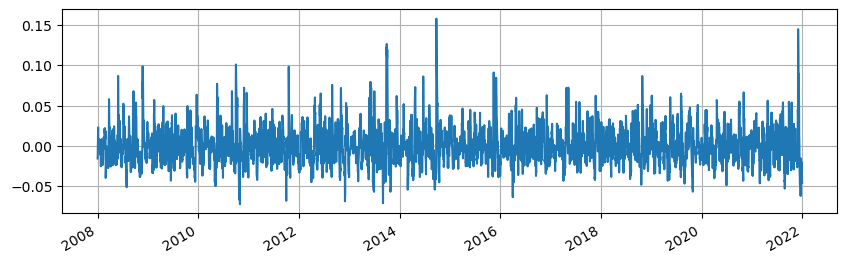

In [81]:
%matplotlib widget
monthly_anomaly["u"].plot()

In [82]:
monthly_anomaly["u"].plot()

<Axes: >

### Скользящее понижение размерности

In [83]:
rm = df.rolling(30).mean()

In [84]:
df["T"].plot(figsize=(10,3))
rm["T"].plot(ax=plt.gca())

<Axes: >

In [85]:
adf = df - rm

In [86]:
adf['T'].plot()

<Axes: >

In [87]:
adf.to_csv

<bound method NDFrame.to_csv of                             T        KE        Ta         u
2008-01-01 12:00:00       NaN       NaN       NaN       NaN
2008-01-02 12:00:00       NaN       NaN       NaN       NaN
2008-01-03 12:00:00       NaN       NaN       NaN       NaN
2008-01-04 12:00:00       NaN       NaN       NaN       NaN
2008-01-05 12:00:00       NaN       NaN       NaN       NaN
...                       ...       ...       ...       ...
2021-12-27 12:00:00 -1.308527 -0.006977 -1.308527 -0.025970
2021-12-28 12:00:00 -1.231912 -0.009548 -1.231912 -0.040010
2021-12-29 12:00:00 -1.157651 -0.010753 -1.157651 -0.047192
2021-12-30 12:00:00 -1.109832 -0.010718 -1.109832 -0.047693
2021-12-31 12:00:00 -1.093692 -0.010410 -1.093692 -0.049717

[5114 rows x 4 columns]>

In [88]:
adf.to_csv("my_data.csv")

In [89]:
adf.to_parquet("my_data.parquet")

In [ ]:
!ls -l my_data*

In [ ]:
adf.to_excel("my_data.xls")

In [ ]:
!conda install xlwt -c conda-forge --yes

In [ ]:
!conda install fastparquet -c conda-forge --yes

In [ ]:
from scipy.io import savemat, loadmat